# Classifying Car Price Ranges

This dataset contains the prices of various models and brands of cars, as well other information including features such as it's fuel type, engine size, and horsepower. <br>
Data from: https://www.kaggle.com/goyalshalini93/car-data

## Loading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('car_prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Cleaning Data

First, I'll split the carName into 2 cols for the car's brand and the car's model:

In [6]:
df['brand'] = df['CarName'].apply(lambda x : x.split(' ')[0]) # use split() method to extract car brand name
df['CarName'] = df.CarName.str.extract('\s(.*)') # using regular expressions to extract car model name
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Will rename CarName col to model:

In [7]:
df.rename(columns={'CarName': 'model'}, inplace=True)
df.head()

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now will check for null values:

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
model               2
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

In [9]:
df[df['model'].isna()]

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
138,139,2,NaN,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru
141,142,0,NaN,gas,std,four,sedan,fwd,front,97.2,...,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0,subaru


Since there are 2 null values for the model feature (specifically the subaru model), I'll replace it with the mode for that brand:

In [10]:
most_common = 'dl'
df.model.fillna(most_common, inplace=True)
df.isnull().sum()

car_ID              0
symboling           0
model               0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

Checking for invalid values:

In [11]:
lst = df.model.unique()
print(lst)

['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'xj' 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc'
 'rx-7 gs' 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'cougar' 'mirage' 'lancer'
 'outlander' 'g4' 'mirage g4' 'montero' 'pajero' 'versa' 'gt-r' 'rogue'
 'latio' 'titan' 'leaf' 'juke' 'note' 'clipper' 'nv200' 'dayz' 'fuga'
 'otti' 'teana' 'kicks' '504' '304' '504 (sw)' '604sl' '505s turbo diesel'
 'fury iii' 'cricket' 'satellite custom (sw)' 'fury gran sedan' 'valiant'

Fix invalid values for car models:

In [12]:
df['model'] = df['model'].replace('100ls', '100 ls')
df['model'] = df['model'].replace('5000s (diesel)', '5000s')

In [13]:
lst = df.brand.unique()
print(lst)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Fix invalid values for car brands:

In [14]:
df['brand'] = df['brand'].replace('maxda', 'mazda')
df['brand'] = df['brand'].replace('Nissan', 'nissan')
df['brand'] = df['brand'].replace('porcshce', 'porsche')
df['brand'] = df['brand'].replace('toyouta', 'toyota')
df['brand'] = df['brand'].replace('vokswagen', 'volkswagen')
df['brand'] = df['brand'].replace('vw', 'volkswagen')

Continuing to check for invalid values:

In [15]:
lst = df.enginetype.unique()
print(lst)

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [16]:
lst = df.drivewheel.unique()
print(lst)

['rwd' 'fwd' '4wd']


In [17]:
lst = df.carbody.unique()
print(lst)

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Now will create bands for the features carlength, carwidth, and carheight:

In [18]:
# Find max and min values for each of these features
print("Max Value for Car Length: ", df['carlength'].max())
print("Min Value for Car Length: ", df['carlength'].min())

print("Max Value for Car Width: ", df['carwidth'].max())
print("Min Value for Car Width: ", df['carwidth'].min())

print("Max Value for Car Height: ", df['carheight'].max())
print("Min Value for Car Height: ", df['carheight'].min())

Max Value for Car Length:  208.1
Min Value for Car Length:  141.1
Max Value for Car Width:  72.3
Min Value for Car Width:  60.3
Max Value for Car Height:  59.8
Min Value for Car Height:  47.8


Look at the spread for each of these features, in order to determine ideal band sizes:

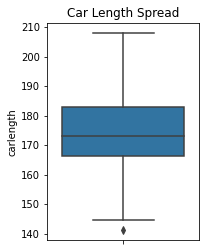

In [19]:
plt.subplot(1,2,2)
plt.title('Car Length Spread')
sns.boxplot(y=df.carlength)
plt.show()

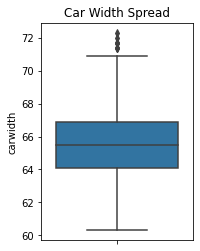

In [20]:
plt.subplot(1,2,2)
plt.title('Car Width Spread')
sns.boxplot(y=df.carwidth)
plt.show()

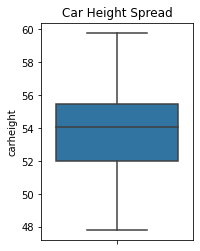

In [21]:
plt.subplot(1,2,2)
plt.title('Car Height Spread')
sns.boxplot(y=df.carheight)
plt.show()

Create bands for features carlength, carwidth, and carheight:

In [22]:
# Carlength- Min: 141.1 and Max: 208.1
df.loc[df['carlength'] <= 165, 'carlength_category'] = 0
df.loc[(df['carlength'] > 165) & (df['carlength'] <= 175), 'carlength_category'] = 1
df.loc[(df['carlength'] > 175) & (df['carlength'] <= 185), 'carlength_category'] = 2
df.loc[df['carlength'] > 185, 'carlength_category'] = 3
df['carlength_category'] = df['carlength_category'].astype(int)
df.head()

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,carlength_category
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,2
4,5,2,100 ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,2


In [23]:
# Carwidth- Min: 60.3 and Max: 72.3
df.loc[df['carwidth'] <= 63, 'carwidth_category'] = 0
df.loc[(df['carwidth'] > 63) & (df['carwidth'] <= 65), 'carwidth_category'] = 1
df.loc[(df['carwidth'] > 65) & (df['carwidth'] <= 70), 'carwidth_category'] = 2
df.loc[df['carwidth'] > 70, 'carwidth_category'] = 3
df['carwidth_category'] = df['carwidth_category'].astype(int)
df.head()

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,carlength_category,carwidth_category
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,1
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,1
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,2
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,2,2
4,5,2,100 ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,2,2


In [24]:
# Carheight- Min: 47.8 and Max: 59.8
df.loc[df['carheight'] <= 52, 'carheight_category'] = 0
df.loc[(df['carheight'] > 52) & (df['carheight'] <= 54), 'carheight_category'] = 1
df.loc[(df['carheight'] > 54) & (df['carheight'] <= 56), 'carheight_category'] = 2
df.loc[df['carheight'] > 56, 'carheight_category'] = 3
df['carheight_category'] = df['carheight_category'].astype(int)
df.head()

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,0
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,0
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000,19,26,16500.0,alfa-romero,1,2,1
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500,24,30,13950.0,audi,2,2,2
4,5,2,100 ls,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500,18,22,17450.0,audi,2,2,2


Determine if the feature wheelbase is needed, by determining its correlation to the features carlength, carwidth, and carheight:

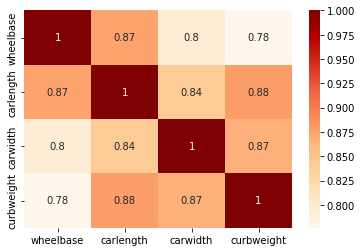

In [25]:
lst = ['wheelbase', 'carlength', 'carwidth','curbweight']
sns.heatmap(df.filter(lst).corr(),cmap="OrRd",annot=True)
plt.show()


Now can delete cols for carlength, carwidth, and carheight as they are no longer needed.
And can also get rid of the wheelbase col as it correlates heavily w the other features (as shown in the heatmap above).

In [26]:
df = df.drop('carlength', axis=1)
df = df.drop('carwidth', axis=1)
df = df.drop('carheight', axis=1)
df = df.drop('wheelbase', axis=1)
df.head()

,car_ID,symboling,model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category
0,1,3,giulia,gas,std,two,convertible,rwd,front,2548,...,9.0,111,5000,21,27,13495.0,alfa-romero,1,1,0
1,2,3,stelvio,gas,std,two,convertible,rwd,front,2548,...,9.0,111,5000,21,27,16500.0,alfa-romero,1,1,0
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,2823,...,9.0,154,5000,19,26,16500.0,alfa-romero,1,2,1
3,4,2,100 ls,gas,std,four,sedan,fwd,front,2337,...,10.0,102,5500,24,30,13950.0,audi,2,2,2
4,5,2,100 ls,gas,std,four,sedan,4wd,front,2824,...,8.0,115,5500,18,22,17450.0,audi,2,2,2


Now map remaining (important) features to numeric values:

In [27]:
# Mapping fuel type
print(df.fueltype.unique())
df['fueltype_category'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df = df.drop('fueltype', axis=1)
df.head()

['gas' 'diesel']


,car_ID,symboling,model,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,...,horsepower,peakrpm,citympg,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category
0,1,3,giulia,std,two,convertible,rwd,front,2548,dohc,...,111,5000,21,27,13495.0,alfa-romero,1,1,0,0
1,2,3,stelvio,std,two,convertible,rwd,front,2548,dohc,...,111,5000,21,27,16500.0,alfa-romero,1,1,0,0
2,3,1,Quadrifoglio,std,two,hatchback,rwd,front,2823,ohcv,...,154,5000,19,26,16500.0,alfa-romero,1,2,1,0
3,4,2,100 ls,std,four,sedan,fwd,front,2337,ohc,...,102,5500,24,30,13950.0,audi,2,2,2,0
4,5,2,100 ls,std,four,sedan,4wd,front,2824,ohc,...,115,5500,18,22,17450.0,audi,2,2,2,0


In [28]:
# Mapping drivewheel 
print(df.drivewheel.unique())
df['drivewheel_category'] = df['drivewheel'].map({'rwd': 0, 'fwd': 1, '4wd': 2})
df = df.drop('drivewheel', axis=1)
df.head()

['rwd' 'fwd' '4wd']


,car_ID,symboling,model,aspiration,doornumber,carbody,enginelocation,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category
0,1,3,giulia,std,two,convertible,front,2548,dohc,four,...,5000,21,27,13495.0,alfa-romero,1,1,0,0,0
1,2,3,stelvio,std,two,convertible,front,2548,dohc,four,...,5000,21,27,16500.0,alfa-romero,1,1,0,0,0
2,3,1,Quadrifoglio,std,two,hatchback,front,2823,ohcv,six,...,5000,19,26,16500.0,alfa-romero,1,2,1,0,0
3,4,2,100 ls,std,four,sedan,front,2337,ohc,four,...,5500,24,30,13950.0,audi,2,2,2,0,1
4,5,2,100 ls,std,four,sedan,front,2824,ohc,five,...,5500,18,22,17450.0,audi,2,2,2,0,2


In [29]:
# Mapping enginetype
print(df.enginetype.unique())
df['enginetype_category'] = df['enginetype'].map({'dohc': 0, 'ohc': 1, 'ohcv': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6})
df = df.drop('enginetype', axis=1)
df.head()

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


,car_ID,symboling,model,aspiration,doornumber,carbody,enginelocation,curbweight,cylindernumber,enginesize,...,citympg,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category
0,1,3,giulia,std,two,convertible,front,2548,four,130,...,21,27,13495.0,alfa-romero,1,1,0,0,0,0
1,2,3,stelvio,std,two,convertible,front,2548,four,130,...,21,27,16500.0,alfa-romero,1,1,0,0,0,0
2,3,1,Quadrifoglio,std,two,hatchback,front,2823,six,152,...,19,26,16500.0,alfa-romero,1,2,1,0,0,2
3,4,2,100 ls,std,four,sedan,front,2337,four,109,...,24,30,13950.0,audi,2,2,2,0,1,1
4,5,2,100 ls,std,four,sedan,front,2824,five,136,...,18,22,17450.0,audi,2,2,2,0,2,1


In [30]:
# Mapping enginelocation 
print(df.enginelocation.unique())
df['enginelocation_category'] = df['enginelocation'].map({'front': 0, 'rear': 1})
df = df.drop('enginelocation', axis=1)
df.head()

['front' 'rear']


,car_ID,symboling,model,aspiration,doornumber,carbody,curbweight,cylindernumber,enginesize,fuelsystem,...,highwaympg,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category
0,1,3,giulia,std,two,convertible,2548,four,130,mpfi,...,27,13495.0,alfa-romero,1,1,0,0,0,0,0
1,2,3,stelvio,std,two,convertible,2548,four,130,mpfi,...,27,16500.0,alfa-romero,1,1,0,0,0,0,0
2,3,1,Quadrifoglio,std,two,hatchback,2823,six,152,mpfi,...,26,16500.0,alfa-romero,1,2,1,0,0,2,0
3,4,2,100 ls,std,four,sedan,2337,four,109,mpfi,...,30,13950.0,audi,2,2,2,0,1,1,0
4,5,2,100 ls,std,four,sedan,2824,five,136,mpfi,...,22,17450.0,audi,2,2,2,0,2,1,0


Create bands for horsepower feature:

In [31]:
# First find max and min values for the horsepower feature
print("Max Value for Horsepower: ", df['horsepower'].max())
print("Min Value for Horsepower: ", df['horsepower'].min())

Max Value for Horsepower:  288
Min Value for Horsepower:  48


Look at the spread for the horsepower feature, in order to determine its ideal band size:

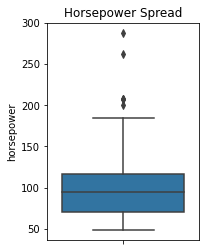

In [32]:
plt.subplot(1,2,2)
plt.title('Horsepower Spread')
sns.boxplot(y=df.horsepower)
plt.show()

In [33]:
# Horsepower- Min: 48 and Max: 288
df.loc[df['horsepower'] <= 65, 'horsepower_category'] = 0
df.loc[(df['horsepower'] > 65) & (df['horsepower'] <= 100), 'horsepower_category'] = 1
df.loc[(df['horsepower'] > 100) & (df['horsepower'] <= 150), 'horsepower_category'] = 2
df.loc[(df['horsepower'] > 150) & (df['horsepower'] <= 190), 'horsepower_category'] = 3
df.loc[df['horsepower'] > 190, 'horsepower_category'] = 4
df['horsepower_category'] = df['horsepower_category'].astype(int)
df.head()

,car_ID,symboling,model,aspiration,doornumber,carbody,curbweight,cylindernumber,enginesize,fuelsystem,...,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category
0,1,3,giulia,std,two,convertible,2548,four,130,mpfi,...,13495.0,alfa-romero,1,1,0,0,0,0,0,2
1,2,3,stelvio,std,two,convertible,2548,four,130,mpfi,...,16500.0,alfa-romero,1,1,0,0,0,0,0,2
2,3,1,Quadrifoglio,std,two,hatchback,2823,six,152,mpfi,...,16500.0,alfa-romero,1,2,1,0,0,2,0,3
3,4,2,100 ls,std,four,sedan,2337,four,109,mpfi,...,13950.0,audi,2,2,2,0,1,1,0,2
4,5,2,100 ls,std,four,sedan,2824,five,136,mpfi,...,17450.0,audi,2,2,2,0,2,1,0,2


Can now delete horsepower col as it is no longer necessary:

In [34]:
df = df.drop('horsepower', 1)
df.head()

,car_ID,symboling,model,aspiration,doornumber,carbody,curbweight,cylindernumber,enginesize,fuelsystem,...,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category
0,1,3,giulia,std,two,convertible,2548,four,130,mpfi,...,13495.0,alfa-romero,1,1,0,0,0,0,0,2
1,2,3,stelvio,std,two,convertible,2548,four,130,mpfi,...,16500.0,alfa-romero,1,1,0,0,0,0,0,2
2,3,1,Quadrifoglio,std,two,hatchback,2823,six,152,mpfi,...,16500.0,alfa-romero,1,2,1,0,0,2,0,3
3,4,2,100 ls,std,four,sedan,2337,four,109,mpfi,...,13950.0,audi,2,2,2,0,1,1,0,2
4,5,2,100 ls,std,four,sedan,2824,five,136,mpfi,...,17450.0,audi,2,2,2,0,2,1,0,2


Now will determine which cols are necessary and which cols can be omitted, by looking at scatterplots and the correlation coefficient bw various features and price:

In [35]:
df.columns

Index(['car_ID', 'symboling', 'model', 'aspiration', 'doornumber', 'carbody',
       'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brand', 'carlength_category', 'carwidth_category',
       'carheight_category', 'fueltype_category', 'drivewheel_category',
       'enginetype_category', 'enginelocation_category',
       'horsepower_category'],
      dtype='object')

Determine if there is a correlation bw curbweight and price:

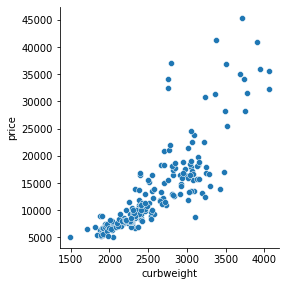

Correlation coefficient between Price and Curbweight:  0.8353048793372965


In [36]:
import scipy
from scipy.stats.stats import pearsonr

sns.pairplot(df, x_vars=['curbweight'], y_vars=['price'], height=4, aspect=1, kind="scatter")
plt.show()

pearson_coeff, p_value = pearsonr(df['curbweight'], df['price'])
print('Correlation coefficient between Price and Curbweight: ', pearson_coeff)

Determine if there is a correlation bw boreratio and price:

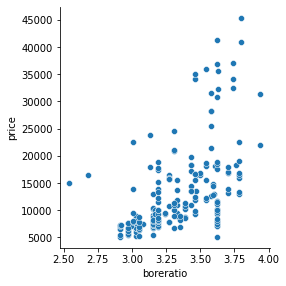

Correlation coefficient between Price and Boreratio:  0.5531732367984437


In [37]:
sns.pairplot(df, x_vars=['boreratio'], y_vars=['price'], height=4, aspect=1, kind="scatter")
plt.show()

pearson_coeff, p_value = pearsonr(df['boreratio'], df['price'])
print('Correlation coefficient between Price and Boreratio: ', pearson_coeff)

We see that there isn't a strong correlation between price and boreratio, and thus it would be safe to remove this col from our df:

In [38]:
df = df.drop('boreratio', 1)

Determine if there is a correlation bw enginesize, stroke, symboling and price:

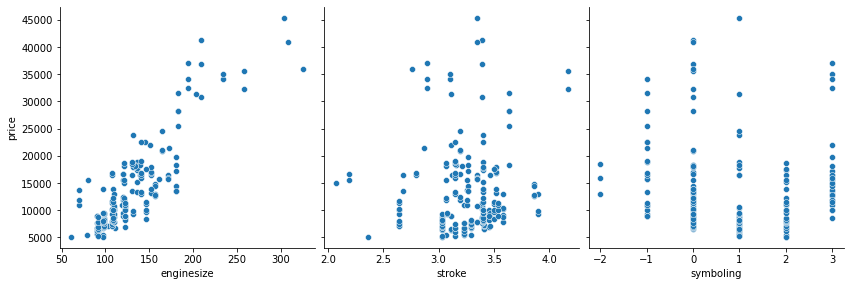

Correlation coefficient between Price and Engine Size:  0.8741448025245117
Correlation coefficient between Price and Stroke:  0.07944308388193103
Correlation coefficient between Price and Symboling:  -0.07997822464270349


In [39]:
sns.pairplot(df, x_vars=['enginesize', 'stroke', 'symboling'], y_vars=['price'], height=4, aspect=1, kind="scatter")
plt.show()

pearson_coeff, p_value = pearsonr(df['enginesize'], df['price'])
print('Correlation coefficient between Price and Engine Size: ', pearson_coeff)

pearson_coeff, p_value = pearsonr(df['stroke'], df['price'])
print('Correlation coefficient between Price and Stroke: ', pearson_coeff)

pearson_coeff, p_value = pearsonr(df['symboling'], df['price'])
print('Correlation coefficient between Price and Symboling: ', pearson_coeff)

Since there isn't a strong correlation between stroke, symboling and price, I'll remove these cols from the df:

In [40]:
df = df.drop('stroke', 1)
df = df.drop('symboling', 1)

Determine if there is a correlation bw compressionratio, peakrpm and price: 

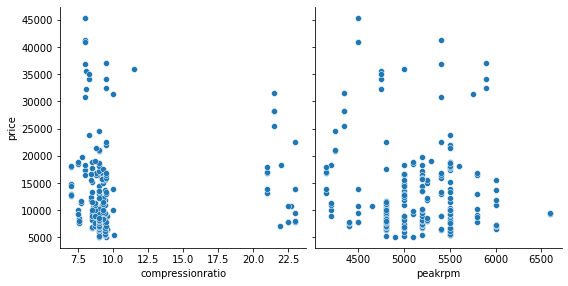

Correlation coefficient between Price and Compression Ratio:  0.06798350579944264
Correlation coefficient between Price and Peak Rpm:  -0.08526715027785686


In [41]:
sns.pairplot(df, x_vars=['compressionratio', 'peakrpm'], y_vars=['price'], height=4, aspect=1, kind="scatter")
plt.show()

pearson_coeff, p_value = pearsonr(df['compressionratio'], df['price'])
print('Correlation coefficient between Price and Compression Ratio: ', pearson_coeff)

pearson_coeff, p_value = pearsonr(df['peakrpm'], df['price'])
print('Correlation coefficient between Price and Peak Rpm: ', pearson_coeff)

Since there isn't a strong correlation between compressionratio, peakrpm and price, I'll remove these cols from the df:

In [42]:
df = df.drop('compressionratio', 1)
df = df.drop('peakrpm', 1)

Determine if there is a correlation bw citympg, highwaympg and price:

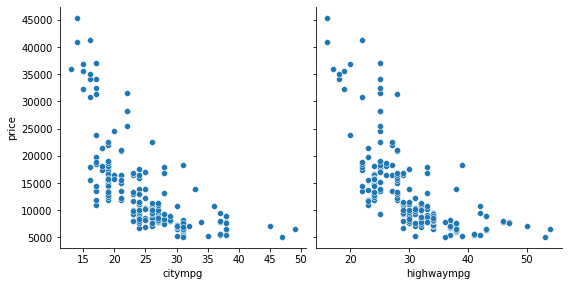

Correlation coefficient between Price and City Mpg:  -0.6857513360270399
Correlation coefficient between Price and Highway Mpg:  -0.6975990916465563


In [43]:
sns.pairplot(df, x_vars=['citympg', 'highwaympg'], y_vars=['price'], height=4, aspect=1, kind="scatter")
plt.show()

pearson_coeff, p_value = pearsonr(df['citympg'], df['price'])
print('Correlation coefficient between Price and City Mpg: ', pearson_coeff)

pearson_coeff, p_value = pearsonr(df['highwaympg'], df['price'])
print('Correlation coefficient between Price and Highway Mpg: ', pearson_coeff)

Since there isn't a strong correlation between citympg, highwaympg and price, I'll remove these cols from the df. I will also remove the model col as I will use the brand of the car as a feature for the classifier:

In [44]:
df = df.drop('highwaympg', 1)
df = df.drop('citympg', 1)
df = df.drop('model', 1)
df.head()

,car_ID,aspiration,doornumber,carbody,curbweight,cylindernumber,enginesize,fuelsystem,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category
0,1,std,two,convertible,2548,four,130,mpfi,13495.0,alfa-romero,1,1,0,0,0,0,0,2
1,2,std,two,convertible,2548,four,130,mpfi,16500.0,alfa-romero,1,1,0,0,0,0,0,2
2,3,std,two,hatchback,2823,six,152,mpfi,16500.0,alfa-romero,1,2,1,0,0,2,0,3
3,4,std,four,sedan,2337,four,109,mpfi,13950.0,audi,2,2,2,0,1,1,0,2
4,5,std,four,sedan,2824,five,136,mpfi,17450.0,audi,2,2,2,0,2,1,0,2


Since I know now that the enginesize feature is useful, I will create bands for the enginesize feature:

In [45]:
# First find max and min values for the engine size feature
print("Max Value for Engine Size: ", df['enginesize'].max())
print("Min Value for Engine Size: ", df['enginesize'].min())

Max Value for Engine Size:  326
Min Value for Engine Size:  61


Look at the spread for the enginesize feature, in order to determine its ideal band size:

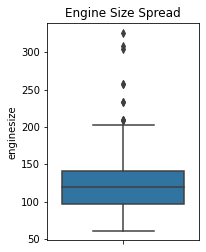

In [46]:
plt.subplot(1,2,2)
plt.title('Engine Size Spread')
sns.boxplot(y=df.enginesize)
plt.show()

In [47]:
# Engine Size- Min: 61 and Max: 326
df.loc[df['enginesize'] <= 90, 'enginesize_category'] = 0
df.loc[(df['enginesize'] > 90) & (df['enginesize'] <= 130), 'enginesize_category'] = 1
df.loc[(df['enginesize'] > 130) & (df['enginesize'] <= 150), 'enginesize_category'] = 2
df.loc[(df['enginesize'] > 150) & (df['enginesize'] <= 200), 'enginesize_category'] = 3
df.loc[df['enginesize'] > 200, 'enginesize_category'] = 4
df['enginesize_category'] = df['enginesize_category'].astype(int)
df.head()

,car_ID,aspiration,doornumber,carbody,curbweight,cylindernumber,enginesize,fuelsystem,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category
0,1,std,two,convertible,2548,four,130,mpfi,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1
1,2,std,two,convertible,2548,four,130,mpfi,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1
2,3,std,two,hatchback,2823,six,152,mpfi,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3
3,4,std,four,sedan,2337,four,109,mpfi,13950.0,audi,2,2,2,0,1,1,0,2,1
4,5,std,four,sedan,2824,five,136,mpfi,17450.0,audi,2,2,2,0,2,1,0,2,2


Now will remove the enginesize col as it is no longer necessary:

In [48]:
df = df.drop('enginesize', 1)
df.head()

,car_ID,aspiration,doornumber,carbody,curbweight,cylindernumber,fuelsystem,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category
0,1,std,two,convertible,2548,four,mpfi,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1
1,2,std,two,convertible,2548,four,mpfi,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1
2,3,std,two,hatchback,2823,six,mpfi,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3
3,4,std,four,sedan,2337,four,mpfi,13950.0,audi,2,2,2,0,1,1,0,2,1
4,5,std,four,sedan,2824,five,mpfi,17450.0,audi,2,2,2,0,2,1,0,2,2


Since I know now that the curbweight feature is useful, I will create bands for the curbweight feature:

In [49]:
# First find max and min values for the curbweight feature
print("Max Value for Curbweight: ", df['curbweight'].max())
print("Min Value for Curbweight: ", df['curbweight'].min())

Max Value for Curbweight:  4066
Min Value for Curbweight:  1488


Look at the spread for the curbweight feature, in order to determine its ideal band size:

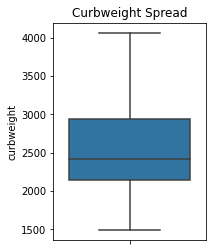

In [50]:
plt.subplot(1,2,2)
plt.title('Curbweight Spread')
sns.boxplot(y=df.curbweight)
plt.show()

In [51]:
# Curbweight- Min: 1488 and Max: 4066
df.loc[df['curbweight'] <= 2100, 'curbweight_category'] = 0
df.loc[(df['curbweight'] > 2100) & (df['curbweight'] <= 2500), 'curbweight_category'] = 1
df.loc[(df['curbweight'] > 2500) & (df['curbweight'] <= 2900), 'curbweight_category'] = 2
df.loc[df['curbweight'] > 2900, 'curbweight_category'] = 3
df['curbweight_category'] = df['curbweight_category'].astype(int)
df.head()

,car_ID,aspiration,doornumber,carbody,curbweight,cylindernumber,fuelsystem,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category,curbweight_category
0,1,std,two,convertible,2548,four,mpfi,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1,2
1,2,std,two,convertible,2548,four,mpfi,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1,2
2,3,std,two,hatchback,2823,six,mpfi,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3,2
3,4,std,four,sedan,2337,four,mpfi,13950.0,audi,2,2,2,0,1,1,0,2,1,1
4,5,std,four,sedan,2824,five,mpfi,17450.0,audi,2,2,2,0,2,1,0,2,2,2


Now will remove the curbweight col as it is no longer necessary:

In [52]:
df = df.drop('curbweight', 1)
df.head()

,car_ID,aspiration,doornumber,carbody,cylindernumber,fuelsystem,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category,curbweight_category
0,1,std,two,convertible,four,mpfi,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1,2
1,2,std,two,convertible,four,mpfi,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1,2
2,3,std,two,hatchback,six,mpfi,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3,2
3,4,std,four,sedan,four,mpfi,13950.0,audi,2,2,2,0,1,1,0,2,1,1
4,5,std,four,sedan,five,mpfi,17450.0,audi,2,2,2,0,2,1,0,2,2,2


Now will map the remaining categorical values to numeric values (for the classifier):

In [53]:
# Mapping aspiration type
print(df.aspiration.unique())
df['aspiration_category'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df = df.drop('aspiration', axis=1)

# Mapping doornumber type
print(df.doornumber.unique())
df['doornumber_category'] = df['doornumber'].map({'two': 0, 'four': 1})
df = df.drop('doornumber', axis=1)

# Mapping carbody type
print(df.carbody.unique())
df['carbody_category'] = df['carbody'].map({'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4})
df = df.drop('carbody', axis=1)

# Mapping cylindernumber type
print(df.cylindernumber.unique())
df['cylindernumber_category'] = df['cylindernumber'].map({'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6})
df = df.drop('cylindernumber', axis=1)

# Mapping fuelsystem type
print(df.fuelsystem.unique())
df['fuelsystem_category'] = df['fuelsystem'].map({'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7})
df = df.drop('fuelsystem', axis=1)
df.head()

['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


,car_ID,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category,curbweight_category,aspiration_category,doornumber_category,carbody_category,cylindernumber_category,fuelsystem_category
0,1,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0
1,2,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0
2,3,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3,2,0,0,1,1,0
3,4,13950.0,audi,2,2,2,0,1,1,0,2,1,1,0,1,2,0,0
4,5,17450.0,audi,2,2,2,0,2,1,0,2,2,2,0,1,2,2,0


Create categories for price ranges:

In [54]:
# First find max and min values for the car price label
print("Max Value for Car Prices: ", df['price'].max())
print("Min Value for Car Prices: ", df['price'].min())

Max Value for Car Prices:  45400.0
Min Value for Car Prices:  5118.0


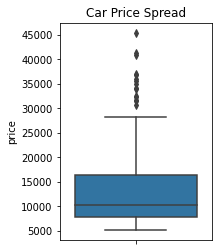

In [59]:
plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()

In [60]:
# Car Price- Min: $5118.00 and Max: $45400.00
df.loc[df['price'] <= 7000, 'pricerange_category'] = 0
df.loc[(df['price'] > 7000) & (df['price'] <= 10000), 'pricerange_category'] = 1
df.loc[(df['price'] > 10000) & (df['price'] <= 13000), 'pricerange_category'] = 2
df.loc[(df['price'] > 13000) & (df['price'] <= 16000), 'pricerange_category'] = 3
df.loc[(df['price'] > 16000) & (df['price'] <= 19000), 'pricerange_category'] = 4
df.loc[(df['price'] > 19000) & (df['price'] <= 22000), 'pricerange_category'] = 5
df.loc[(df['price'] > 22000) & (df['price'] <= 25000), 'pricerange_category'] = 6
df.loc[(df['price'] > 25000) & (df['price'] <= 28000), 'pricerange_category'] = 7
df.loc[(df['price'] > 28000) & (df['price'] <= 31000), 'pricerange_category'] = 8
df.loc[(df['price'] > 31000) & (df['price'] <= 33000), 'pricerange_category'] = 9
df.loc[df['price'] > 33000, 'pricerange_category'] = 10
df['pricerange_category'] = df['pricerange_category'].astype(int)
df.head()

,car_ID,price,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category,curbweight_category,aspiration_category,doornumber_category,carbody_category,cylindernumber_category,fuelsystem_category,pricerange_category
0,1,13495.0,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0,3
1,2,16500.0,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0,4
2,3,16500.0,alfa-romero,1,2,1,0,0,2,0,3,3,2,0,0,1,1,0,4
3,4,13950.0,audi,2,2,2,0,1,1,0,2,1,1,0,1,2,0,0,3
4,5,17450.0,audi,2,2,2,0,2,1,0,2,2,2,0,1,2,2,0,4


In [61]:
df = df.drop('price', 1)
df.head()

,car_ID,brand,carlength_category,carwidth_category,carheight_category,fueltype_category,drivewheel_category,enginetype_category,enginelocation_category,horsepower_category,enginesize_category,curbweight_category,aspiration_category,doornumber_category,carbody_category,cylindernumber_category,fuelsystem_category,pricerange_category
0,1,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0,3
1,2,alfa-romero,1,1,0,0,0,0,0,2,1,2,0,0,0,0,0,4
2,3,alfa-romero,1,2,1,0,0,2,0,3,3,2,0,0,1,1,0,4
3,4,audi,2,2,2,0,1,1,0,2,1,1,0,1,2,0,0,3
4,5,audi,2,2,2,0,2,1,0,2,2,2,0,1,2,2,0,4


## Prepare Training and Testing Datasets

In [62]:
# 67% of the data from df will be used for training and 33% of it will be used for testing
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.67, test_size=0.33, random_state = 0)

In [63]:
y_train = train_df['pricerange_category']
y_test = test_df['pricerange_category']

features = ['car_ID', 'brand', 'carlength_category', 'carwidth_category', 'carheight_category', 'fueltype_category', 'drivewheel_category', 'enginetype_category', 'enginelocation_category', 'horsepower_category', 'enginesize_category', 'curbweight_category', 'aspiration_category', 'doornumber_category', 'carbody_category', 'cylindernumber_category', 'fuelsystem_category']
x_train = pd.get_dummies(train_df[features])
x_test = pd.get_dummies(test_df[features])

## Using the Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.predict(x_test)

array([ 0,  3,  4,  0,  1,  1,  0,  0,  4,  0,  4, 10,  3,  4,  0,  1,  2,
        4,  1,  0,  1,  2,  1,  1,  4,  1,  1,  2,  1,  0,  1,  2,  4,  2,
        1,  9,  1,  4,  0, 10,  0,  3, 10,  2,  1,  1,  0,  2,  2,  1,  4,
        0,  1,  1,  4,  4,  2,  4,  1,  0,  0,  2,  1,  2,  3,  3,  0,  0])

In [65]:
# Mean Accuracy
model_score = round(model.score(x_train, train_df['pricerange_category']) * 100, 2)
print(model_score)

100.0
